In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:
# Setting up dataset and view options
initial_homes = pd.read_csv(r'C:\Users\luisp\Downloads\ml-challenge-2023-30412\train.csv')
pd.set_option('display.min_rows', 25)
initial_homes

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
0,10461,60000,True,Buono stato / Abitabile,1980.0,41.901300,12.700000,175.00,30.0,2.0,NaN,1.0,NaN,3.0,1.0,1.00000,35.0
1,51304,900000,NaN,Buono stato / Abitabile,NaN,41.907017,12.481311,NaN,NaN,3.0,NaN,1.0,1.0,NaN,3.0,1.00000,131.0
2,33032,33000,NaN,Buono stato / Abitabile,1960.0,41.976500,12.440500,204.20,30.0,4.0,NaN,1.0,NaN,4.0,1.0,1.00000,16.0
3,62281,166000,NaN,Ottimo / Ristrutturato,NaN,45.484800,12.198200,175.00,NaN,1.0,True,1.0,NaN,1.0,2.0,0.99205,100.0
4,45681,410000,True,Buono stato / Abitabile,NaN,45.424480,12.328622,65.91,NaN,3.0,NaN,2.0,1.0,NaN,3.0,1.00000,90.0
5,59924,89000,NaN,Buono stato / Abitabile,NaN,41.874581,12.541382,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,2.0,1.00000,30.0
6,36856,632000,True,Buono stato / Abitabile,NaN,41.864600,12.500900,202.39,NaN,2.0,NaN,3.0,1.0,5.0,4.0,1.00000,NaN
7,47960,147000,True,Buono stato / Abitabile,1960.0,45.501742,12.254337,NaN,150.0,-1.0,NaN,1.0,1.0,NaN,5.0,1.00000,107.0
8,7326,275000,True,Ottimo / Ristrutturato,1950.0,41.896900,12.519100,175.00,60.0,6.0,NaN,1.0,1.0,7.0,3.0,1.00000,75.0
9,44039,459000,True,Ottimo / Ristrutturato,1995.0,41.906400,12.420300,175.00,100.0,0.0,True,3.0,NaN,2.0,5.0,1.00000,130.0


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'construction_year'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'energy_efficiency'}>,
        <AxesSubplot:title={'center':'expenses'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'n_bathrooms'}>,
        <AxesSubplot:title={'center':'elevator'}>,
        <AxesSubplot:title={'center':'total_floors'}>,
        <AxesSubplot:title={'center':'n_rooms'}>],
       [<AxesSubplot:title={'center':'proximity_to_center'}>,
        <AxesSubplot:title={'center':'surface'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

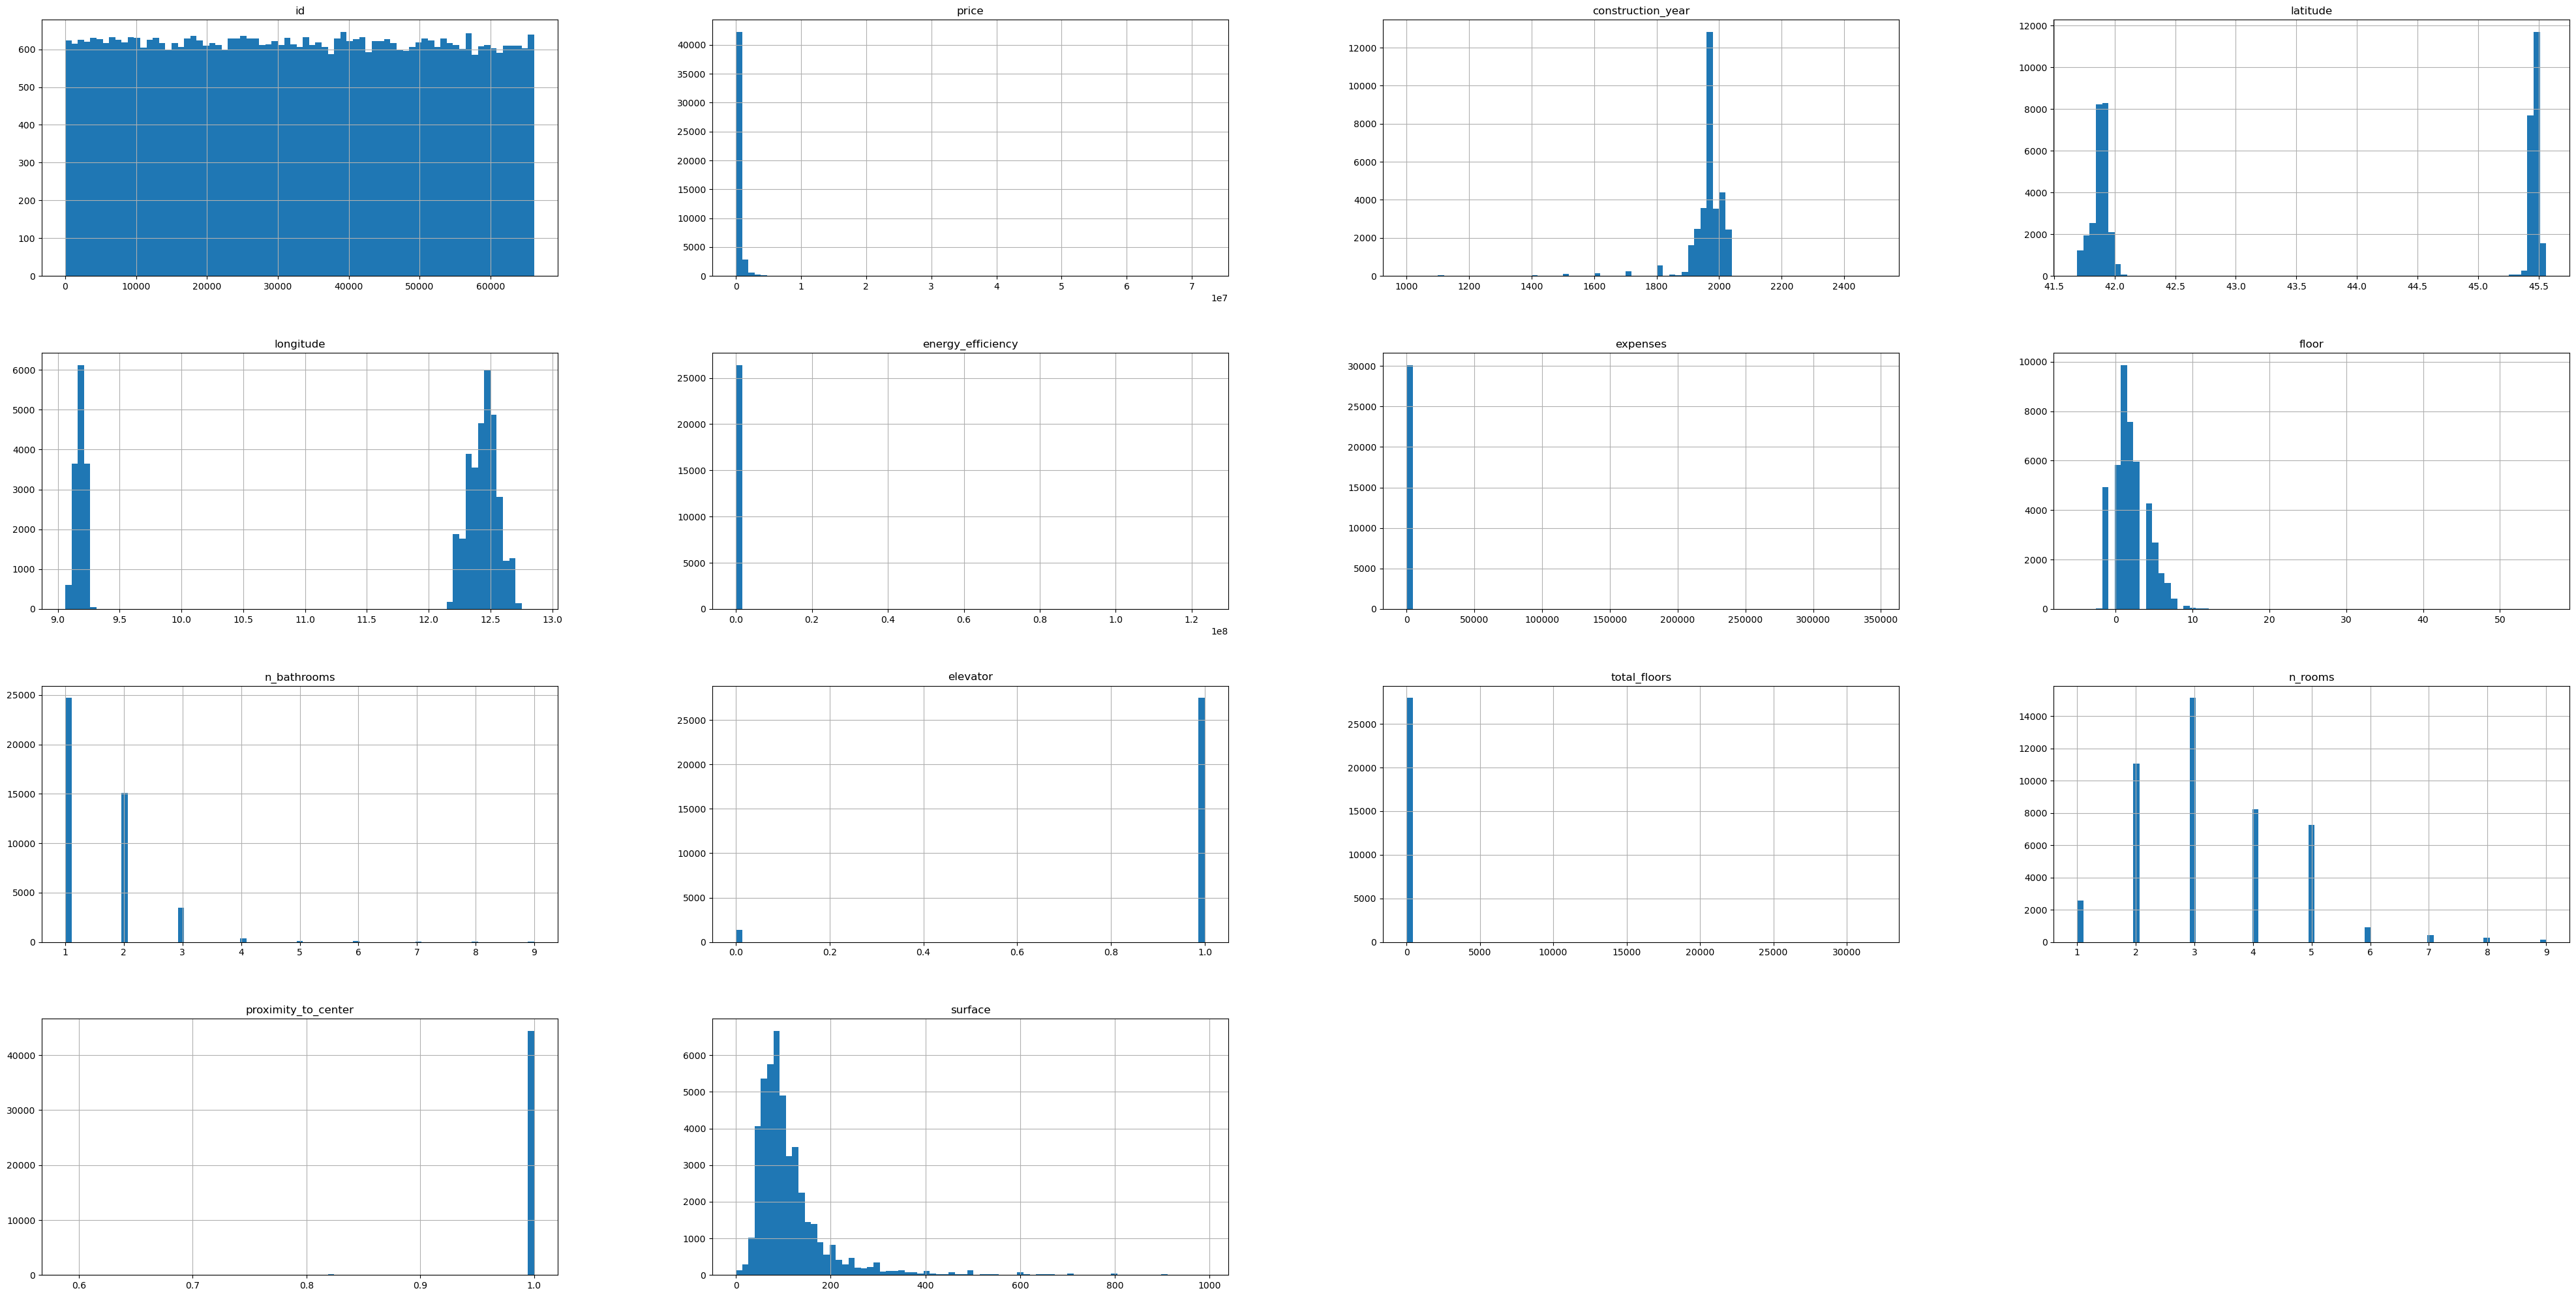

In [30]:
# Let's get an initial feel of our datas' distributions with some summary statistics and histograms
initial_homes.hist(bins=75, figsize=(50, 25))

In [31]:
initial_homes.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,46312.000000,4.631200e+04,32366.000000,46299.000000,46299.000000,2.640900e+04,30158.000000,44281.000000,43896.000000,28869.000000,27963.000000,45959.000000,46299.000000,45869.000000
mean,32960.756132,5.031879e+05,1958.032874,43.534743,11.451295,5.091382e+03,195.285132,2.033333,1.559140,0.952510,5.724207,3.284166,0.994756,114.866620
std,19090.178152,1.106504e+06,72.021035,1.789416,1.502453,7.600521e+05,4035.008418,2.175668,0.769869,0.212689,191.115233,1.329654,0.030093,88.650549
min,0.000000,1.540000e+02,1000.000000,41.690300,9.060775,1.000000e-02,0.000000,-5.000000,1.000000,0.000000,1.000000,1.000000,0.588014,0.000000
25%,16466.500000,1.990000e+05,1950.000000,41.882400,9.221300,1.590000e+02,40.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,68.000000
50%,32906.500000,3.150000e+05,1967.000000,41.960604,12.361864,1.750000e+02,80.000000,2.000000,1.000000,1.000000,4.000000,3.000000,1.000000,91.000000
75%,49489.250000,5.150000e+05,1987.000000,45.465800,12.487604,1.750000e+02,150.000000,3.000000,2.000000,1.000000,6.000000,4.000000,1.000000,130.000000
max,66159.000000,7.200000e+07,2500.000000,45.561298,12.854100,1.234570e+08,346000.000000,56.000000,9.000000,1.000000,31960.000000,9.000000,1.000000,990.000000


In [32]:
# Some initial impressions: the maxima of several columns immediately raises a few suspicions
# With Construction year(2500) and  total floors(32k) being the clearly impossible ones
# Some minima also raise suspicions: surface area of 0 and to a lesser degree the price being in the hundreds
# For now, I'll leave those values be as I want to do some more data exploration before starting to clean and transform
# Let's see how bad our missing data problem is

initial_homes.isna().sum()

id                         0
price                      0
balcony                15443
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                 31529
n_bathrooms             2416
elevator               17443
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

In [33]:
# Garden having over half of the values missing is concerning and must be kept in mind
# The rest of the columns while not perfect don't seem to be too bad
# Thankfully we're not missing any of the prices and very few of the locations (lat, lon)
# Let's check if there are any exact duplicates
initial_homes.duplicated().sum()


0

In [34]:
# Even though, there aren't any exact duplicates, there might still be a few duplicates. We will come back to this later
# To get a feel for the price, I want to get a view of the sorted values
initial_homes.sort_values("price")

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
4488,39430,154,True,Nuovo / Nuova costruzione,2019.0,41.853586,12.652271,NaN,NaN,NaN,True,2.0,NaN,NaN,5.0,1.000000,119.0
15605,46741,650,NaN,Buono stato / Abitabile,NaN,45.476200,12.197400,NaN,0.0,3.0,NaN,1.0,NaN,3.0,4.0,1.000000,80.0
7132,62599,1000,NaN,Ottimo / Ristrutturato,NaN,45.482689,12.250937,NaN,NaN,2.0,True,3.0,NaN,NaN,5.0,1.000000,190.0
1123,60369,1000,True,Ottimo / Ristrutturato,NaN,41.735241,12.259580,180.00,100.0,1.0,NaN,1.0,1.0,NaN,3.0,0.793269,60.0
8799,9279,1000,NaN,NaN,NaN,41.924900,12.489800,175.00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.000000,150.0
35572,65324,1000,NaN,Ottimo / Ristrutturato,NaN,45.483269,12.252280,111.00,NaN,0.0,True,3.0,NaN,2.0,4.0,1.000000,190.0
25883,19015,1100,NaN,Ottimo / Ristrutturato,1960.0,45.470700,9.236800,118.27,100.0,0.0,NaN,1.0,1.0,6.0,2.0,1.000000,60.0
10757,39790,3900,NaN,Buono stato / Abitabile,NaN,45.433700,12.338300,NaN,29.0,1.0,NaN,1.0,NaN,2.0,1.0,1.000000,40.0
30519,15179,4000,NaN,NaN,NaN,45.462800,9.110040,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.000000,NaN
24062,51110,4500,NaN,Ottimo / Ristrutturato,2010.0,41.850500,12.438100,3.51,4.0,1.0,NaN,NaN,NaN,1.0,NaN,1.000000,NaN


In [35]:
# This is very useful, let's start by the first few results
# The 154 price initially didn't seem impossible (remember the famous 1€ sicillian homes)
# However, taking a closer look, it is. Being in the outskirts of Rome and supposedly new. This is clearly wrong
# At the opposite end looking up the most expensive "house" it's easy to see it is the Colosseum
# This is the first row that will clearly be removed later
# Looking at the other values though, there are other concerns. 13368 and 15100 have exactly the same coordinates 
# but they have conflicting data. This arouses suspicions of other potential coordinate duplicates. Let's check
initial_homes[initial_homes.duplicated(["latitude", "longitude"])].sort_values("latitude")

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
8267,18071,219000,True,Ottimo / Ristrutturato,1980.0,41.716900,12.310100,175.00,40.0,1.0,True,1.0,1.0,6.0,3.0,0.834287,75.0
46220,22198,96960,NaN,Buono stato / Abitabile,NaN,41.720993,12.502324,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,1.000000,70.0
17830,47861,87000,NaN,Buono stato / Abitabile,NaN,41.720993,12.502324,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,3.0,1.000000,100.0
26268,33811,121200,True,Buono stato / Abitabile,NaN,41.720993,12.502324,NaN,NaN,1.0,NaN,1.0,NaN,NaN,4.0,1.000000,214.0
32139,31727,149000,True,Ottimo / Ristrutturato,NaN,41.722300,12.522400,175.00,0.0,1.0,NaN,2.0,NaN,1.0,3.0,1.000000,70.0
43088,48195,790000,True,Ottimo / Ristrutturato,NaN,41.722700,12.501000,22.24,0.0,0.0,True,NaN,NaN,3.0,5.0,1.000000,410.0
19819,61344,229000,True,Ottimo / Ristrutturato,2007.0,41.723200,12.517000,175.00,50.0,0.0,True,2.0,NaN,1.0,4.0,1.000000,150.0
27487,8424,65000,True,Da ristrutturare,1980.0,41.723200,12.521900,175.00,0.0,0.0,NaN,1.0,NaN,2.0,2.0,1.000000,65.0
31998,13610,639000,True,Buono stato / Abitabile,1980.0,41.723900,12.357000,175.00,0.0,0.0,True,2.0,NaN,1.0,3.0,0.941552,135.0
41053,64304,9000,NaN,Buono stato / Abitabile,NaN,41.723900,12.357000,175.00,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0.941552,12.0


In [36]:
# There are a lot and it's easy to see a lot of them have conflicting data
# Since we dont'want to train our model on duplicate and conflicting data, we will drop them right away
# To keep the quality of our data as high as possible I will choose the row with the least missing values to be kept
# Of course, this is a heuristic choice
unique_homes = initial_homes.assign(counts=initial_homes.count(axis=1)).sort_values("counts").drop_duplicates(["latitude", "longitude"], keep="last").drop("counts", axis=1)

In [37]:
# Now that we have removed the duplicated (lat, lon) pairs
unique_homes

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
8261,62191,2000000,NaN,Buono stato / Abitabile,NaN,45.437008,12.317841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
36495,50213,97500,NaN,NaN,NaN,45.499800,9.221920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.000000,47.0
37026,56997,525000,NaN,NaN,NaN,41.962719,12.602970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.000000,292.0
18880,45581,25323,NaN,NaN,NaN,45.473300,12.225500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.000000,70.0
38443,59454,78000,NaN,NaN,NaN,45.436600,9.175070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.000000,50.0
18899,41700,1690000,NaN,Da ristrutturare,NaN,41.873027,12.422452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,400.0
8070,38370,56250,NaN,NaN,NaN,45.500600,9.182480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.000000,75.0
21301,4602,157500,NaN,Buono stato / Abitabile,NaN,45.474241,9.111637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,150.0
26461,6248,540000,NaN,Buono stato / Abitabile,NaN,41.891170,12.512662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,360.0
42510,32313,2250000,NaN,Buono stato / Abitabile,NaN,45.473421,9.223768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,847.0


In [38]:
# Let's once again explore our data
unique_homes.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,36384.000000,3.638400e+04,25899.000000,36383.000000,36383.000000,2.017100e+04,24540.000000,34743.000000,34576.000000,22786.000000,20966.000000,36122.000000,36383.000000,36302.000000
mean,32936.378710,5.117961e+05,1956.289200,43.578733,11.443213,6.622047e+03,203.380929,2.002590,1.568487,0.946897,4.526519,3.318227,0.994482,116.318330
std,19064.823318,1.128026e+06,70.083325,1.792802,1.503294,8.696716e+05,4070.573225,2.163565,0.790175,0.224243,2.647533,1.353425,0.030882,90.244651
min,0.000000,6.500000e+02,1000.000000,41.690300,9.060775,1.000000e-02,0.000000,-5.000000,1.000000,0.000000,1.000000,1.000000,0.588014,0.000000
25%,16436.750000,1.990000e+05,1950.000000,41.882899,9.220600,1.630000e+02,40.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,70.000000
50%,32862.000000,3.150000e+05,1965.000000,41.973560,12.356800,1.750000e+02,80.000000,2.000000,1.000000,1.000000,4.000000,3.000000,1.000000,93.000000
75%,49389.250000,5.200000e+05,1980.000000,45.467329,12.486200,1.750000e+02,150.000000,3.000000,2.000000,1.000000,6.000000,4.000000,1.000000,130.000000
max,66159.000000,7.200000e+07,2500.000000,45.561298,12.854100,1.234570e+08,346000.000000,56.000000,9.000000,1.000000,135.000000,9.000000,1.000000,990.000000


In [39]:
# Let's see how dire the construction year situation is
unique_homes.sort_values("construction_year", ascending=False)

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
30496,6258,145000,NaN,Buono stato / Abitabile,2500.0,45.497383,12.253994,NaN,200.0,1.0,NaN,1.0,NaN,NaN,6.0,1.0,98.0
17999,35368,520000,True,Nuovo / Nuova costruzione,2025.0,45.428000,9.202100,3.51,100.0,-1.0,True,1.0,1.0,7.0,3.0,1.0,163.0
10606,6332,730000,True,Nuovo / Nuova costruzione,2025.0,45.510800,9.233700,3.51,NaN,4.0,True,3.0,1.0,4.0,4.0,1.0,181.0
7168,4432,226200,True,Nuovo / Nuova costruzione,2025.0,45.505755,9.244630,NaN,NaN,2.0,True,1.0,1.0,NaN,2.0,1.0,58.0
27655,24183,440700,True,Nuovo / Nuova costruzione,2025.0,45.505800,9.244600,175.00,0.0,2.0,True,2.0,1.0,5.0,3.0,1.0,113.0
5446,25052,695000,True,Nuovo / Nuova costruzione,2024.0,41.923536,12.478871,NaN,NaN,2.0,NaN,1.0,1.0,NaN,3.0,1.0,120.0
29425,23353,835000,True,Nuovo / Nuova costruzione,2024.0,45.457207,9.222064,NaN,NaN,1.0,True,2.0,1.0,NaN,4.0,1.0,137.0
23312,17526,262000,NaN,Nuovo / Nuova costruzione,2024.0,45.518167,9.224409,NaN,NaN,1.0,True,1.0,1.0,NaN,2.0,1.0,51.0
36374,16810,1550600,True,Nuovo / Nuova costruzione,2024.0,45.448800,9.161300,3.51,NaN,0.0,True,3.0,1.0,10.0,5.0,1.0,181.0
33940,2501,235000,NaN,Nuovo / Nuova costruzione,2024.0,45.517867,9.222809,NaN,NaN,1.0,True,1.0,1.0,NaN,2.0,1.0,40.0


<AxesSubplot:xlabel='construction_year', ylabel='price'>

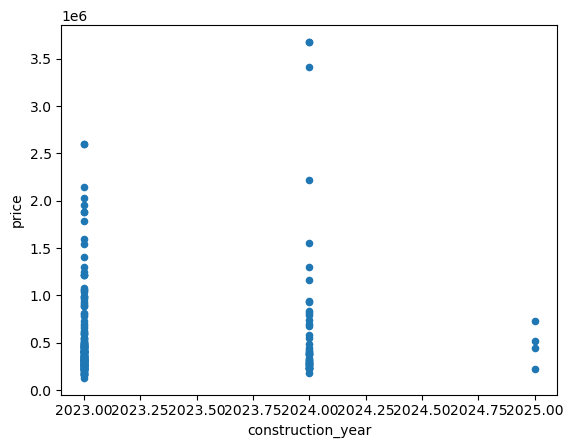

In [46]:
# Let's visualize all the values greater than or equal to 2023 with a histogram
unique_homes[(unique_homes['construction_year'] >= 2023) & (unique_homes['construction_year'] < 2050)][["price", "construction_year"]].plot(kind="scatter", x="construction_year", y="price")

In [53]:
# I want to understand better what these homes with wrong data look like
# For now I will only work with those that have 2024 or greater as their value 
futuristic_homes = unique_homes[unique_homes["construction_year"] > 2023]
futuristic_homes

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
30496,6258,145000,NaN,Buono stato / Abitabile,2500.0,45.497383,12.253994,NaN,200.0,1.0,NaN,1.0,NaN,NaN,6.0,1.0,98.0
19857,35620,2215000,True,Nuovo / Nuova costruzione,2024.0,45.456299,9.201572,NaN,NaN,-1.0,NaN,2.0,1.0,NaN,4.0,1.0,197.0
27616,33296,235000,True,Nuovo / Nuova costruzione,2024.0,45.498770,9.137263,NaN,NaN,1.0,NaN,1.0,1.0,NaN,3.0,1.0,110.0
40157,44020,318000,NaN,Nuovo / Nuova costruzione,2024.0,45.516167,9.224209,NaN,NaN,1.0,True,1.0,1.0,NaN,2.0,1.0,61.0
18622,37497,335000,NaN,Nuovo / Nuova costruzione,2024.0,45.516267,9.223009,NaN,NaN,1.0,True,1.0,1.0,NaN,3.0,1.0,64.0
23312,17526,262000,NaN,Nuovo / Nuova costruzione,2024.0,45.518167,9.224409,NaN,NaN,1.0,True,1.0,1.0,NaN,2.0,1.0,51.0
40230,18849,405000,True,Nuovo / Nuova costruzione,2024.0,45.509044,9.221137,NaN,NaN,2.0,NaN,2.0,1.0,NaN,3.0,1.0,87.0
2539,18213,274300,True,Nuovo / Nuova costruzione,2024.0,45.492776,9.209316,NaN,NaN,2.0,NaN,1.0,1.0,NaN,2.0,1.0,55.0
33940,2501,235000,NaN,Nuovo / Nuova costruzione,2024.0,45.517867,9.222809,NaN,NaN,1.0,True,1.0,1.0,NaN,2.0,1.0,40.0
5446,25052,695000,True,Nuovo / Nuova costruzione,2024.0,41.923536,12.478871,NaN,NaN,2.0,NaN,1.0,1.0,NaN,3.0,1.0,120.0


In [54]:
futuristic_homes.count()

id                     51
price                  51
balcony                43
conditions             51
construction_year      51
latitude               51
longitude              51
energy_efficiency      29
expenses               22
floor                  51
garden                 39
n_bathrooms            51
elevator               49
total_floors           30
n_rooms                51
proximity_to_center    51
surface                51
dtype: int64

In [56]:
# Let's see how many missing values these homes have, if one field is blatantly wrong, we should likely be weary of the row
futuristic_homes.isna().sum()

id                      0
price                   0
balcony                 8
conditions              0
construction_year       0
latitude                0
longitude               0
energy_efficiency      22
expenses               29
floor                   0
garden                 12
n_bathrooms             0
elevator                2
total_floors           21
n_rooms                 0
proximity_to_center     0
surface                 0
dtype: int64